In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression       #Regression Model
from sklearn.linear_model import LogisticRegression     #Classification Model
from sklearn.tree import DecisionTreeClassifier         #Classification Model
from sklearn.ensemble import RandomForestClassifier     #Classification Model
from sklearn.svm import SVC                             #Classification Model
from sklearn.neighbors import KNeighborsClassifier      #Classification Model
from sklearn.preprocessing import PolynomialFeatures    #Regression Model
from sklearn.linear_model import Lasso                  #Regression Model
from sklearn.linear_model import Ridge                  #Regression Model
from sklearn.svm import SVR                             #Regression Model
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.shape

(1025, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
X = heart_data.drop(columns="target", axis=1)
Y = heart_data['target']

In [9]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [13]:
"""input_data1=(2,150,72,30,0,33.5,0.600,48)
input_data2=(3,120,75,35,1,32.0,0.500,35)
input_data3=(1,135,78,32,2,33.0,0.575,38)"""
input_data1 = np.random.rand(13) 
input_data2 = np.random.rand(13)
input_data3 = np.random.rand(13)
# change the input data to a numpy array
input_data_as_numpy_array1= np.asarray(input_data1)
input_data_as_numpy_array2= np.asarray(input_data2)
input_data_as_numpy_array3= np.asarray(input_data3)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)
input_data_reshaped2= input_data_as_numpy_array2.reshape(1,-1)
input_data_reshaped3= input_data_as_numpy_array3.reshape(1,-1)

In [14]:
# 1. Logistic Regression (for classification tasks)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
accuracycla1= accuracy_score(Y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_logreg))
prediction21 = logreg.predict(input_data_reshaped1)
print("Logistic Regression Prediction for Person 1:", prediction21)
prediction22 = logreg.predict(input_data_reshaped2)
print("Logistic Regression Prediction for Person 2:", prediction22)
prediction23 = logreg.predict(input_data_reshaped3)
print("Logistic Regression Prediction for Person 3:", prediction23)
#person 1
if (prediction21[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction22[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction23[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')

Logistic Regression Accuracy: 0.8048780487804879
Logistic Regression Prediction for Person 1: [0]
Logistic Regression Prediction for Person 2: [0]
Logistic Regression Prediction for Person 3: [0]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but 

In [15]:
## 2. K-Nearest Neighbors Classifier

# Import the necessary model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN Classifier (using 5 neighbors as a common starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print the accuracy
accuracycla2 = accuracy_score(Y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracycla2)

# Make predictions for the specific input data
prediction21 = knn.predict(input_data_reshaped1)
print(prediction21)
prediction22 = knn.predict(input_data_reshaped2)
print(prediction22)
prediction23 = knn.predict(input_data_reshaped3)
print(prediction23)

# person 1 prediction interpretation
if (prediction21[0] == 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')

# person 2 prediction interpretation
if (prediction22[0] == 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')

# person 3 prediction interpretation
if (prediction23[0] == 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')

K-Nearest Neighbors Accuracy: 0.7219512195121951
[0]
[0]
[0]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
# 3. Support Vector Machine (SVM) Classifier
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
accuracycla3=accuracy_score(Y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))
prediction31 = svm.predict(input_data_reshaped1)
print("SVM Prediction for Person 1:", prediction31)
prediction32 = svm.predict(input_data_reshaped2)
print("SVM Prediction for Person 2:", prediction32) 
prediction33 = svm.predict(input_data_reshaped3)
print("SVM Prediction for Person 3:", prediction33)
#person 1
if (prediction31[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction32[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction33[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')

C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Accuracy: 0.7073170731707317
SVM Prediction for Person 1: [0]
SVM Prediction for Person 2: [0]
SVM Prediction for Person 3: [0]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


In [17]:
# 4. Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
y_pred_dtree = dtree.predict(X_test)
accuracycla4 = accuracy_score(Y_test, y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dtree))
prediction41 = dtree.predict(input_data_reshaped1)
print(prediction31)
prediction42 = dtree.predict(input_data_reshaped2)
print(prediction32)
prediction43 = dtree.predict(input_data_reshaped3)
print(prediction43)
#person 1
if (prediction31[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction32[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3
if (prediction33[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')


Decision Tree Accuracy: 1.0
[0]
[0]
[1]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
# 5. Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
accuracycla5 = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))
prediction51 = rf.predict(input_data_reshaped1)
print(prediction51)
prediction52 = rf.predict(input_data_reshaped2)
print(prediction52)
prediction53 = rf.predict(input_data_reshaped3)
print(prediction53)
#persion 1
if (prediction51[0]== 0):
  print('The Person 1 does not have a Heart Disease')
else:
  print('The Person 1 has Heart Disease')
#person 2
if (prediction52[0]== 0):
  print('The Person 2 does not have a Heart Disease')
else:
  print('The Person 2 has Heart Disease')
#person 3 
if (prediction53[0]== 0):
  print('The Person 3 does not have a Heart Disease')
else:
  print('The Person 3 has Heart Disease')


Random Forest Accuracy: 1.0
[1]
[1]
[1]
The Person 1 has Heart Disease
The Person 2 has Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
# 6. Linear Regression (for Regression tasks)
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
y_pred_linreg = linreg.predict(X_test)

y_pred_binary = np.where(y_pred_linreg >= 0.5, 1, 0)
accuracyreg1 = accuracy_score(Y_test, y_pred_binary)
print("Accuracy:", accuracyreg1)

prediction61 = linreg.predict(input_data_reshaped1)
print("LinearRegression Prediction:", prediction61)

prediction62 = linreg.predict(input_data_reshaped1)
print("LinearRegression Prediction:", prediction62)

prediction63 = linreg.predict(input_data_reshaped3)
print("LinearRegression Prediction:", prediction63)

#person 1
binary_prediction = 1 if prediction61[0] >= 0.5 else 0

if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
#person 2
binary_prediction = 1 if prediction62[0] >= 0.5 else 0

if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
#person 3
binary_prediction = 1 if prediction63[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

Accuracy: 0.8048780487804879
LinearRegression Prediction: [0.74810723]
LinearRegression Prediction: [0.74810723]
LinearRegression Prediction: [0.72429722]
The Person 1 has Heart Disease
The Person 2 has Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# 7. Polynomial Regression (for Regression tasks)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Initialize the Polynomial Regressor (degree 2 used as an example)
poly_regressor = make_pipeline(PolynomialFeatures(degree=2),
                               LinearRegression())

# 2. Fit the model
poly_regressor.fit(X_train, Y_train)

# 3. Predict continuous values on the test set
y_pred_poly = poly_regressor.predict(X_test)

# 4. Convert continuous predictions to binary (0 or 1)
y_pred_binary_poly = np.where(y_pred_poly >= 0.5, 1, 0)
accuracyreg2 = accuracy_score(Y_test, y_pred_binary_poly)
print("Polynomial Regression Accuracy:", accuracyreg2)

# 5. Make predictions for individual persons
prediction71 = poly_regressor.predict(input_data_reshaped1)
prediction72 = poly_regressor.predict(input_data_reshaped2) # Corrected to input_data_reshaped2
prediction73 = poly_regressor.predict(input_data_reshaped3)

print("Polynomial Regression Prediction (Person 1):", prediction71)
print("Polynomial Regression Prediction (Person 2):", prediction72)
print("Polynomial Regression Prediction (Person 3):", prediction73)

# person 1
binary_prediction = 1 if prediction71[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
    
# person 2
binary_prediction = 1 if prediction72[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
    
# person 3
binary_prediction = 1 if prediction73[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

Polynomial Regression Accuracy: 0.9024390243902439
Polynomial Regression Prediction (Person 1): [-3.37212384]
Polynomial Regression Prediction (Person 2): [-2.81953377]
Polynomial Regression Prediction (Person 3): [-4.00685012]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [23]:
# 6. Lasso Regression (for Regression tasks)
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Initialize the Lasso Regressor (alpha=0.01 used as an example)
lasso_reg = Lasso(alpha=0.01)

# 2. Fit the model
lasso_reg.fit(X_train, Y_train)

# 3. Predict continuous values on the test set
y_pred_lasso = lasso_reg.predict(X_test)

# 4. Convert continuous predictions to binary (0 or 1)
y_pred_binary_lasso = np.where(y_pred_lasso >= 0.5, 1, 0)
accuracyreg3 = accuracy_score(Y_test, y_pred_binary_lasso)
print("Lasso Regression Accuracy:", accuracyreg3)

# 5. Make predictions for individual persons
prediction81 = lasso_reg.predict(input_data_reshaped1)
prediction82 = lasso_reg.predict(input_data_reshaped2)
prediction83 = lasso_reg.predict(input_data_reshaped3)

print("Lasso Regression Prediction (Person 1):", prediction81)
print("Lasso Regression Prediction (Person 2):", prediction82)
print("Lasso Regression Prediction (Person 3):", prediction83)

# person 1
binary_prediction = 1 if prediction81[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
    
# person 2
binary_prediction = 1 if prediction82[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
    
# person 3
binary_prediction = 1 if prediction83[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

Lasso Regression Accuracy: 0.8
Lasso Regression Prediction (Person 1): [0.62341795]
Lasso Regression Prediction (Person 2): [0.74901291]
Lasso Regression Prediction (Person 3): [0.6110583]
The Person 1 has Heart Disease
The Person 2 has Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [24]:
# 9. Ridge Regression (for Regression tasks)
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Initialize the Ridge Regressor (alpha=1.0 used as an example)
ridge_reg = Ridge(alpha=1.0)

# 2. Fit the model
ridge_reg.fit(X_train, Y_train)

# 3. Predict continuous values on the test set
y_pred_ridge = ridge_reg.predict(X_test)

# 4. Convert continuous predictions to binary (0 or 1)
y_pred_binary_ridge = np.where(y_pred_ridge >= 0.5, 1, 0)
accuracyreg4 = accuracy_score(Y_test, y_pred_binary_ridge)
print("Ridge Regression Accuracy:", accuracyreg4)

# 5. Make predictions for individual persons
prediction91 = ridge_reg.predict(input_data_reshaped1)
prediction92 = ridge_reg.predict(input_data_reshaped2)
prediction93 = ridge_reg.predict(input_data_reshaped3)

print("Ridge Regression Prediction (Person 1):", prediction91)
print("Ridge Regression Prediction (Person 2):", prediction92)
print("Ridge Regression Prediction (Person 3):", prediction93)

# person 1
binary_prediction = 1 if prediction91[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
    
# person 2
binary_prediction = 1 if prediction92[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
    
# person 3
binary_prediction = 1 if prediction93[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

Ridge Regression Accuracy: 0.8048780487804879
Ridge Regression Prediction (Person 1): [0.7452581]
Ridge Regression Prediction (Person 2): [0.86997474]
Ridge Regression Prediction (Person 3): [0.72173202]
The Person 1 has Heart Disease
The Person 2 has Heart Disease
The Person 3 has Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [25]:
# 10. SVR(Regression) (for Regression tasks)
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Initialize the SVR model (RBF kernel used as an example)
# NOTE: Scaling data (e.g., StandardScaler) is typically required for SVR performance.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# 2. Fit the model
svr_model.fit(X_train, Y_train)

# 3. Predict continuous values on the test set
y_pred_svr = svr_model.predict(X_test)

# 4. Convert continuous predictions to binary (0 or 1)
y_pred_binary_svr = np.where(y_pred_svr >= 0.5, 1, 0)
accuracyreg5 = accuracy_score(Y_test, y_pred_binary_svr)
print("SVR Accuracy:", accuracyreg5)

# 5. Make predictions for individual persons
prediction101 = svr_model.predict(input_data_reshaped1)
prediction102 = svr_model.predict(input_data_reshaped2)
prediction103 = svr_model.predict(input_data_reshaped3)

print("SVR Prediction (Person 1):", prediction101)
print("SVR Prediction (Person 2):", prediction102)
print("SVR Prediction (Person 3):", prediction103)

# person 1
binary_prediction = 1 if prediction101[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 1 does not have a Heart Disease')
else:
    print('The Person 1 has Heart Disease')
    
# person 2
binary_prediction = 1 if prediction102[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 2 does not have a Heart Disease')
else:
    print('The Person 2 has Heart Disease')
    
# person 3
binary_prediction = 1 if prediction103[0] >= 0.5 else 0
if binary_prediction == 0:
    print('The Person 3 does not have a Heart Disease')
else:
    print('The Person 3 has Heart Disease')

SVR Accuracy: 0.8195121951219512
SVR Prediction (Person 1): [-0.69731083]
SVR Prediction (Person 2): [-0.70386634]
SVR Prediction (Person 3): [-0.71133433]
The Person 1 does not have a Heart Disease
The Person 2 does not have a Heart Disease
The Person 3 does not have a Heart Disease


C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\sohel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


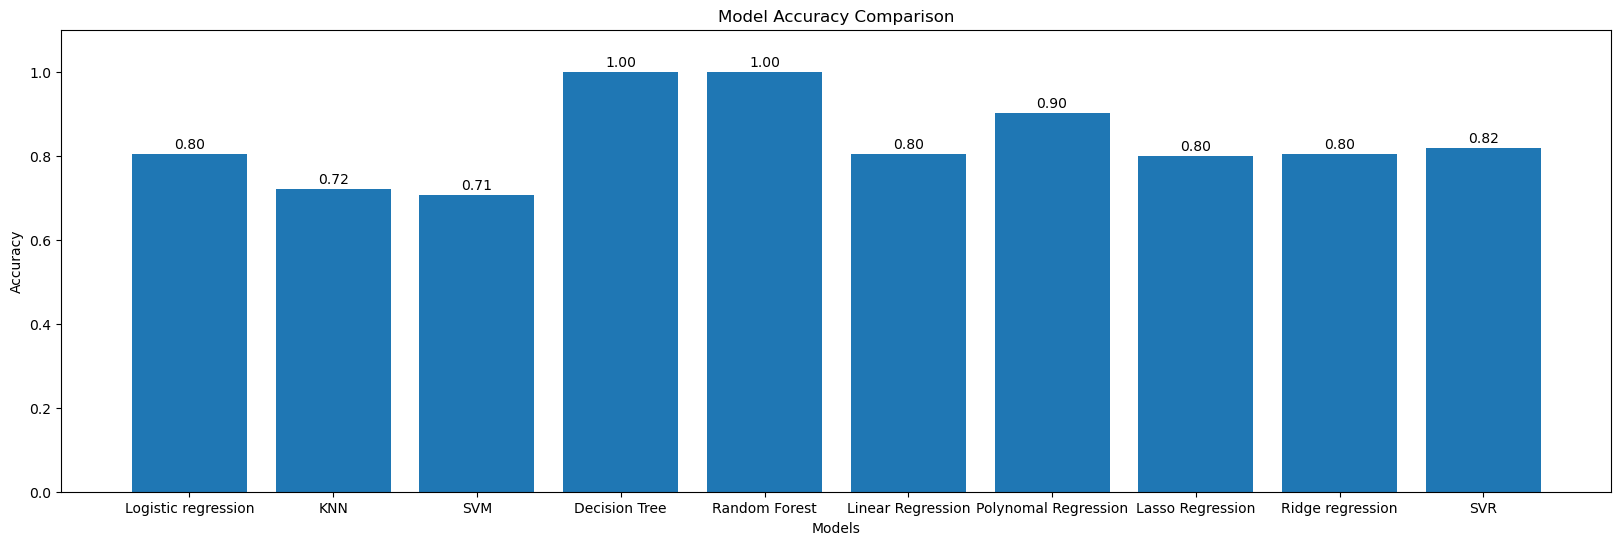

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Example model names and their accuracies
# (Replace these with your actual variables)
model_names = ['Logistic regression','KNN', 'SVM','Decision Tree', 'Random Forest', 'Linear Regression','Polynomal Regression','Lasso Regression','Ridge regression','SVR']
accuracies = [accuracycla1,accuracycla2, accuracycla3, accuracycla4, accuracycla5,accuracyreg1,accuracyreg2,accuracyreg3,accuracyreg4,accuracyreg5]

# Create the bar plot
plt.figure(figsize=(20,6))
bars = plt.bar(model_names, accuracies)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1.1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
